### Data Formatting and Cleaning

In [1]:
import pandas as pd 
import numpy as np 
import json
from matplotlib import pyplot as plt
import cv2
import numpy as np
import ast
from DataLoader import load_data
import re


In [2]:
import json
import pandas as pd

file_paths = [
    'Dataset-20240319T181738Z-001/Dataset/MoonRocksSeedXrays/annotations/instances_default.json',
    'Dataset-20240319T181738Z-001/Dataset/PineNutsSeedXrays/annotations/instances_default.json',
    'Dataset-20240319T181738Z-001/Dataset/RedRockSeedXrays/annotations/instances_default.json'
]

def load_and_filter(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
        annotations = data['annotations']
        df = pd.json_normalize(annotations)
        # Filter data
        filtered_df = df[df['attributes.keyframe'] == True]
        return filtered_df

df_moon_rocks = load_and_filter(file_paths[0])
df_pine_nuts = load_and_filter(file_paths[1])
df_red_rock = load_and_filter(file_paths[2])



In [3]:
def load_image_data(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
        images = data['images']
        df = pd.json_normalize(images)
        return df

df_images_moon_rocks = load_image_data(file_paths[0])
df_images_pine_nuts = load_image_data(file_paths[1])
df_images_red_rock = load_image_data(file_paths[2])


In [4]:
def merge_and_clean(annotations_df, images_df):
    merged_df = pd.merge(annotations_df, images_df, left_on='image_id', right_on='id', how='left')
    merged_df.drop(columns=['id_x', 'id_y', 'coco_url', 'license', 'flickr_url', 'date_captured', 'width', 'height'], inplace=True)
    return merged_df

merged_df_moon_rocks = merge_and_clean(df_moon_rocks, df_images_moon_rocks)
merged_df_pine_nuts = merge_and_clean(df_pine_nuts, df_images_pine_nuts)
merged_df_red_rock = merge_and_clean(df_red_rock, df_images_red_rock)

In [5]:
base_directory_moon_rocks = 'Dataset-20240319T181738Z-001/Dataset/MoonRocksSeedXrays/Moon Rocks/'
base_directory_pine_nuts = 'Dataset-20240319T181738Z-001/Dataset/PineNutsSeedXrays/Pine Nuts/'
base_directory_red_rock = 'Dataset-20240319T181738Z-001/Dataset/RedRockSeedXrays/Red Rock/'


def append_full_filepath(df, base_directory):
    df['full_filepath'] = base_directory + df['file_name']
    return df

merged_df_moon_rocks = append_full_filepath(merged_df_moon_rocks, base_directory_moon_rocks)
merged_df_pine_nuts = append_full_filepath(merged_df_pine_nuts, base_directory_pine_nuts)
merged_df_red_rock = append_full_filepath(merged_df_red_rock, base_directory_red_rock)

In [6]:
merged_df = pd.concat([merged_df_moon_rocks, merged_df_pine_nuts, merged_df_red_rock], ignore_index=True)
merged_df

,image_id,category_id,segmentation,area,bbox,iscrowd,attributes.occluded,attributes.track_id,attributes.keyframe,file_name,full_filepath
0,1,2,"[[1098.8, 340.93, 1101.95, 350.38, 1098.8, 353...",15253.0,"[675.74, 278.94, 426.21, 75.99]",0,False,0,True,21_HECOC8_MR_P1.png,Dataset-20240319T181738Z-001/Dataset/MoonRocks...
1,1,2,"[[833.94, 189.88, 780.98, 178.54, 731.39, 169....",13312.0,"[297.68, 160.46, 536.26, 52.96]",0,False,1,True,21_HECOC8_MR_P1.png,Dataset-20240319T181738Z-001/Dataset/MoonRocks...
2,1,2,"[[866.3, 252.92, 809.14, 243.26, 753.67, 235.6...",18020.0,"[343.49, 228.13, 522.81, 49.97]",0,False,2,True,21_HECOC8_MR_P1.png,Dataset-20240319T181738Z-001/Dataset/MoonRocks...
3,1,2,"[[796.42, 374.16, 742.84, 364.71, 692.06, 358....",15952.0,"[279.15, 332.13, 517.27, 54.64]",0,False,3,True,21_HECOC8_MR_P1.png,Dataset-20240319T181738Z-001/Dataset/MoonRocks...
4,1,2,"[[743.75, 475.33, 709.29, 468.18, 666.84, 466....",13228.0,"[225.98, 454.73, 517.77, 39.09]",0,False,4,True,21_HECOC8_MR_P1.png,Dataset-20240319T181738Z-001/Dataset/MoonRocks...
...,...,...,...,...,...,...,...,...,...,...,...
440,30,1,"[[633.39, 394.08, 635.17, 375.03, 673.87, 366....",15816.0,"[633.39, 366.69, 479.81, 48.82]",0,False,140,True,21_HECOC8_RR_P9.png,Dataset-20240319T181738Z-001/Dataset/RedRockSe...
441,30,2,"[[284.09, 207.07, 382.3, 212.5, 527.7, 201.6, ...",9543.0,"[282.27, 174.9, 463.0, 37.6]",0,False,141,True,21_HECOC8_RR_P9.png,Dataset-20240319T181738Z-001/Dataset/RedRockSe...
442,30,2,"[[350.75, 321.0, 351.4, 308.9, 407.7, 304.0, 5...",8351.0,"[350.75, 298.6, 438.75, 29.7]",0,False,142,True,21_HECOC8_RR_P9.png,Dataset-20240319T181738Z-001/Dataset/RedRockSe...
443,30,1,"[[441.07, 438.23, 453.95, 431.45, 470.88, 453....",12347.0,"[441.07, 431.45, 260.18, 388.91]",0,False,143,True,21_HECOC8_RR_P9.png,Dataset-20240319T181738Z-001/Dataset/RedRockSe...


In [7]:
merged_df['full_filepath'][0]

'Dataset-20240319T181738Z-001/Dataset/MoonRocksSeedXrays/Moon Rocks/21_HECOC8_MR_P1.png'

In [8]:
merged_df['bbox'][0]

[675.74, 278.94, 426.21, 75.99]

In [9]:
merged_df['bbox'] = merged_df['bbox'].apply(lambda x: tuple(x) if isinstance(x, list) else x)


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(merged_df, test_size=0.2, random_state=42)  # 20% data as test set
train_df.to_csv('train_dataset.csv', index=False)
test_df.to_csv('test_dataset.csv', index=False)

In [11]:
masked_images, images, masks, labels = load_data(merged_df)

Failed to load image at Dataset-20240319T181738Z-001/Dataset/PineNutsSeedXrays/Pine Nuts/21_HECOC8_PN_P22.png
Failed to load image at Dataset-20240319T181738Z-001/Dataset/PineNutsSeedXrays/Pine Nuts/21_HECOC8_PN_P22.png
Failed to load image at Dataset-20240319T181738Z-001/Dataset/PineNutsSeedXrays/Pine Nuts/21_HECOC8_PN_P22.png
Failed to load image at Dataset-20240319T181738Z-001/Dataset/PineNutsSeedXrays/Pine Nuts/21_HECOC8_PN_P22.png
Failed to load image at Dataset-20240319T181738Z-001/Dataset/PineNutsSeedXrays/Pine Nuts/21_HECOC8_PN_P22.png


In [16]:
masked_images.shape

(352, 256, 256, 3)

### Data Vis

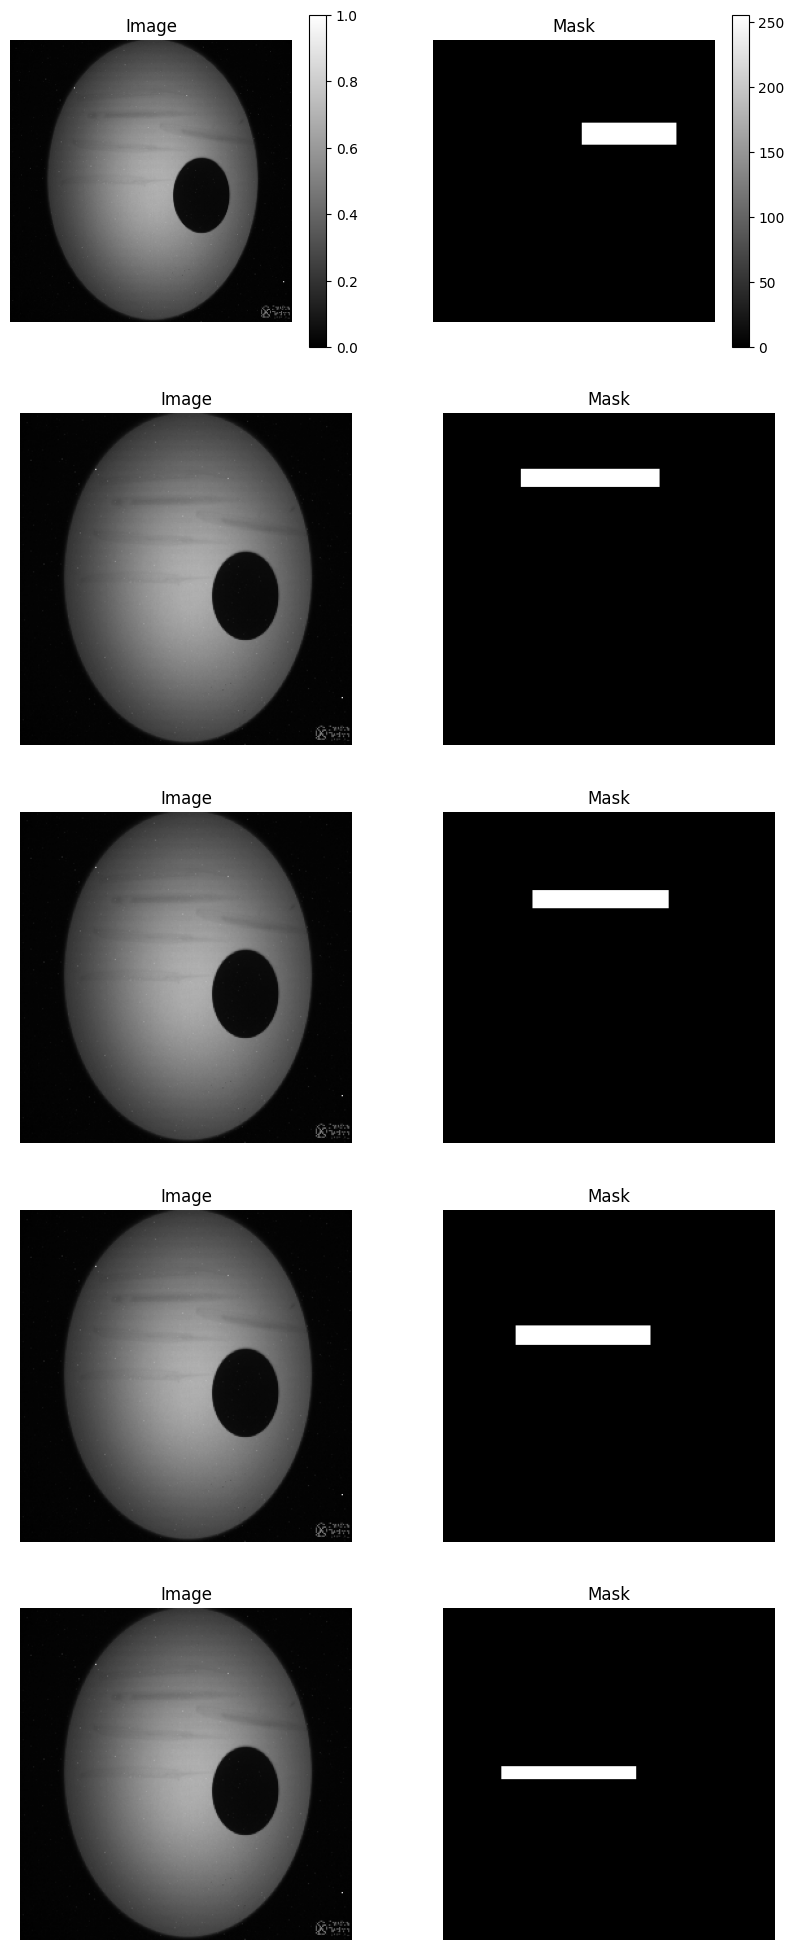

In [14]:
def plot_images_and_masks(images, masks, num_examples=5):
    fig, axs = plt.subplots(num_examples, 2, figsize=(10, num_examples * 5))  

    if num_examples == 1:
        axs = [axs]

    for i in range(num_examples):
        img_plot = axs[i][0].imshow(images[i], cmap='gray')  
        axs[i][0].title.set_text('Image')
        axs[i][0].axis('off')

        mask_plot = axs[i][1].imshow(masks[i], cmap='gray') 
        axs[i][1].title.set_text('Mask')
        axs[i][1].axis('off')

    plt.colorbar(img_plot, ax=axs[0][0], orientation='vertical')
    plt.colorbar(mask_plot, ax=axs[0][1], orientation='vertical')
    plt.show()
plot_images_and_masks(images, masks) 

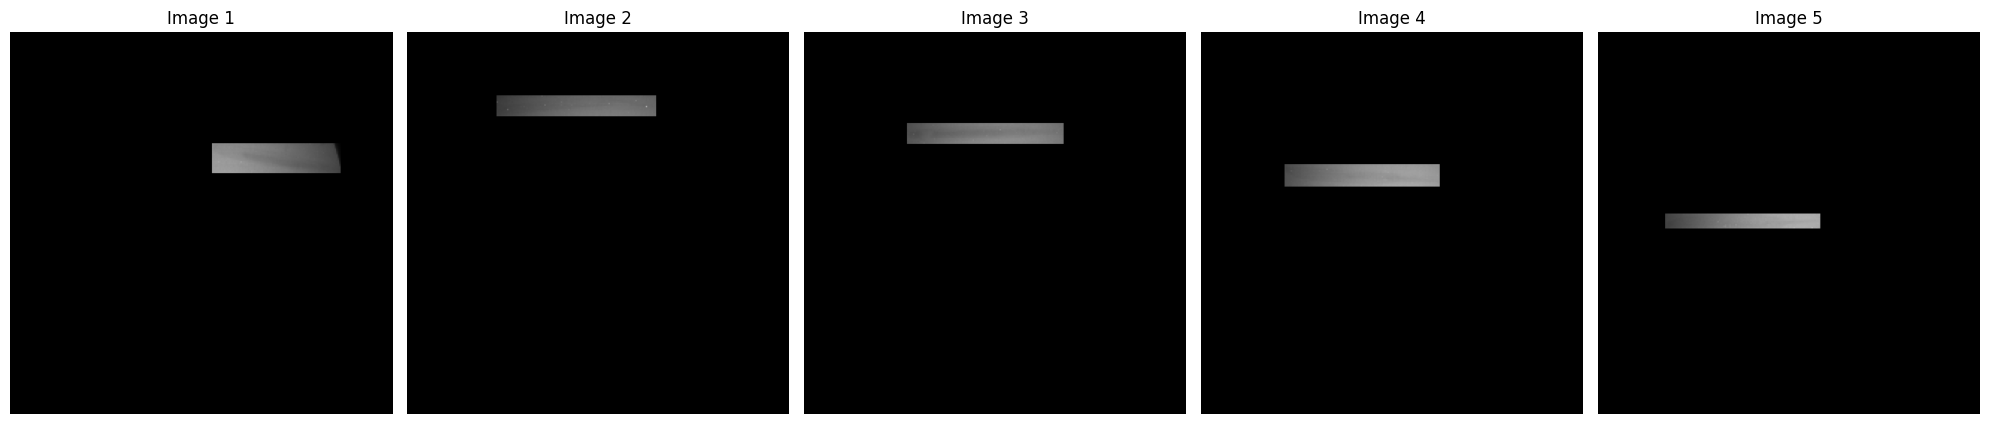

In [47]:
import matplotlib.pyplot as plt

def plot_masked_images(images, num_images=5):
    plt.figure(figsize=(20,20))
    
    for i in range(num_images):
        if i < len(images):
            ax = plt.subplot(1, num_images, i + 1)
            plt.imshow(images[i], cmap='gray')
            plt.title(f'Image {i + 1}')
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()
plot_masked_images(masked_images, num_images=5)  
